In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Importing the data that I saved to a csv from Spotify
df = pd.read_csv('Four_Tet_Album_Data.csv')

In [4]:
# Checking to see how many tracks each album has

df['album'].value_counts()

Everything Ecstatic           29
Pause                         22
Rounds                        20
There Is Love in You          18
Sixteen Oceans                16
New Energy                    14
Beautiful Rewind              11
Pink                           8
Everything Ecstatic Part 2     5
Ringer                         4
Morning / Evening              2
Name: album, dtype: int64

Here are the attributes for the features in the DataFrame:
- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 


- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


- Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 


- Key: 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.


- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 


- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 


- Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


- Popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.


- Speechiness: 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [68]:
# Creating a plotting function to easily plot different graphs

def plot_function(kind, title, x=None, y=None, data=None, bins=10, color=None, palette=None, jitter=True, size=None,
                 rotation=None, alpha=None, figsize=None, hue=None, kde=False, orient=None, width=None):
    
    plt.figure(figsize=(figsize))
    
    if kind == 'Hist':
        sns.distplot(data[x], bins=bins, kde=kde, color=color)
        plt.title(title)
        plt.show()
        
    if kind == 'Bar':
        g = sns.barplot(x=x, y=y, data=data, hue=hue, palette=palette)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()
        
    if kind == 'Strip':
        g = sns.stripplot(x=x, y=y, data=data, jitter=jitter, alpha=alpha, hue=hue, color=color, palette=palette, 
                          size=size)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()
    
    if kind == 'Scatter':
        sns.scatterplot(x=x, y=y, data=data, hue=hue, size=size, alpha=alpha)
        plt.title(title)
        plt.show()
        
    if kind == 'Count':
        g = sns.countplot(x=x, data=data, hue=hue, palette=palette)
        g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
        plt.title(title)
        plt.show()
        
    if kind == 'Box':
        sns.boxplot(x=x, data=data, hue=hue, palette=palette, orient=orient, width=width)
        plt.title(title)
        plt.show()
        


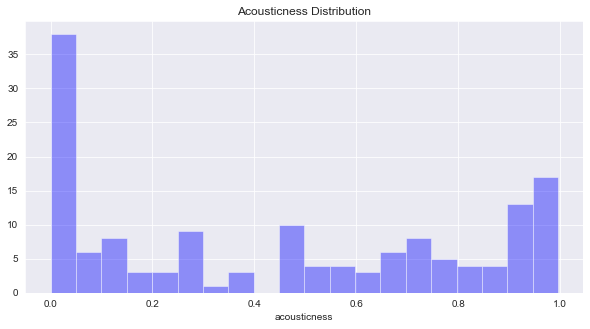

In [10]:
# Plotting the acousticness distribution

plot_function('Hist', 'Acousticness Distribution', x='acousticness', data=df, bins=20, color='blue', kde=False,
             figsize=[10, 5])

From the plot above it looks like Four Tet's tracks vary evenly across the acoustice spectrum, with the exception of very unacoustic tracks being an extreme, with a majority of his tracks being considered highly unacoustic.

In [11]:
# I'm curious if there's a trend between albums and acousticness, so I will group by album, and find the 
# mean acousticness per album. I will also include the release_year, and sort the new dataframe by release_year

acousticness_by_album = df.groupby(['album', 'release_year'])['acousticness'].mean().reset_index()
acousticness_by_album.sort_values('release_year', inplace=True)
acousticness_by_album

,album,release_year,acousticness
5,Pause,2001,0.481049
8,Rounds,2003,0.368170
1,Everything Ecstatic,2005,0.274255
2,Everything Ecstatic Part 2,2006,0.417520
7,Ringer,2008,0.332033
10,There Is Love in You,2010,0.453179
6,Pink,2012,0.161399
0,Beautiful Rewind,2013,0.508401
3,Morning / Evening,2015,0.519000
4,New Energy,2017,0.782429


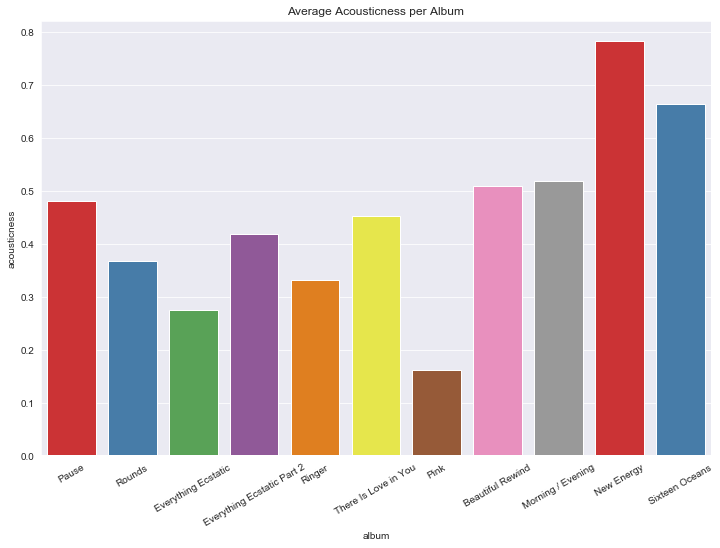

In [13]:
# Plotting the average acousticness per album

plot_function('Bar', 'Average Acousticness per Album', x='album', y='acousticness', 
              data=acousticness_by_album, palette='Set1', figsize=[12, 8], rotation=30)

We can see an interesting trend here as on average Four Tet's last 4 albums have been his most acoustic pieces of work. His album New Energy which he released in 2017 is his most acoustic album which, if you've heard that album makes a lot of sense as he's got a lot of organic and acoustic elements in that album.

His first album was also one of his more acoustic albums on average. His album Pink which was released in 2012 was considered his least acoustic album which is something I find intersting as there are a decent amount of acoustic elements in that album. It's possible that the album was just very uncoventional in it's arrangement and added a lot of unqiue electronic elements that it was hard for the Spotify acoustic algorithm to determine it as a more acoustic album.

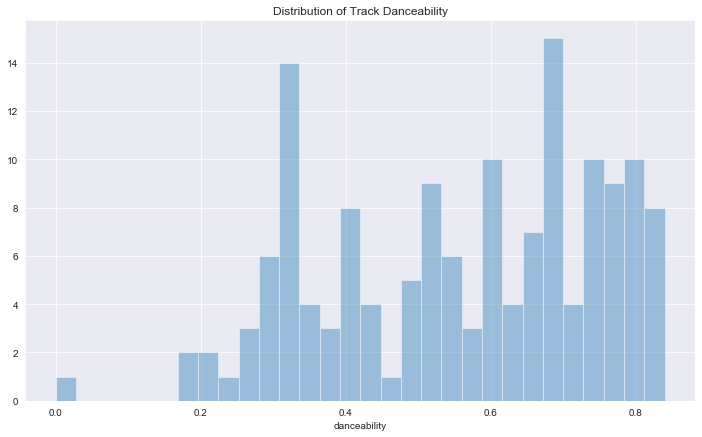

In [14]:
# Next I will look at the Danceability among Four Tet's albums. First I want to look at the distribution of 
# Danceability among his albums discography.

plot_function('Hist', 'Distribution of Track Danceability', x='danceability', data=df, bins=30, figsize=[12, 7])

In [15]:
# Next I want to look at the danceability over albums, and sort ascending from album release year

danceability_by_album = df.groupby(['album', 'release_year'])['danceability'].mean().reset_index()
danceability_by_album.sort_values('release_year', inplace=True)
danceability_by_album

,album,release_year,danceability
5,Pause,2001,0.541818
8,Rounds,2003,0.536000
1,Everything Ecstatic,2005,0.540414
2,Everything Ecstatic Part 2,2006,0.409000
7,Ringer,2008,0.501500
10,There Is Love in You,2010,0.608167
6,Pink,2012,0.714875
0,Beautiful Rewind,2013,0.626727
3,Morning / Evening,2015,0.546500
4,New Energy,2017,0.514643


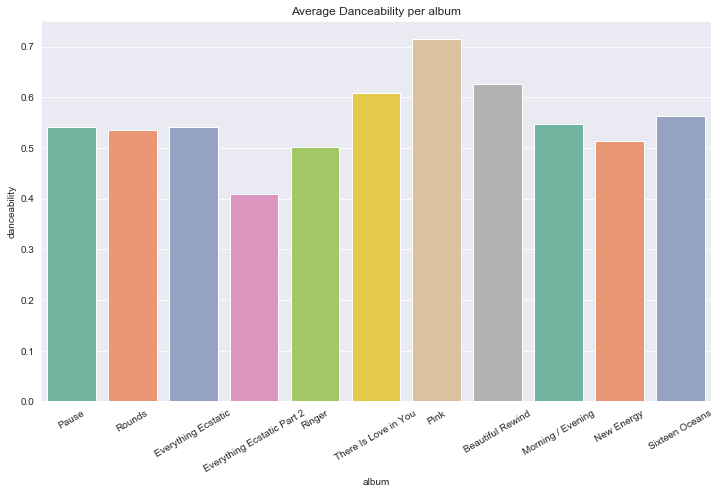

In [16]:
# Plotting the danceability of each album

plot_function('Bar', 'Average Danceability per album', x='album', y='danceability', 
              data=danceability_by_album, palette='Set2', figsize=[12, 7], rotation=30)

It looks like the average danceability amongst Four Tet's albums are relatively consistent, with exception to Everything Ecstatic Part 2, which is  denoted as his least danceable album on average. That being said it looks like the rest of his albums on average are considered more danceable albums with an average danceability greater than 0.5. A lot of his albums hover around 0.5 danceability though and this could be due to the diversity most of his albums have with a combination of dance and ambient tracks.

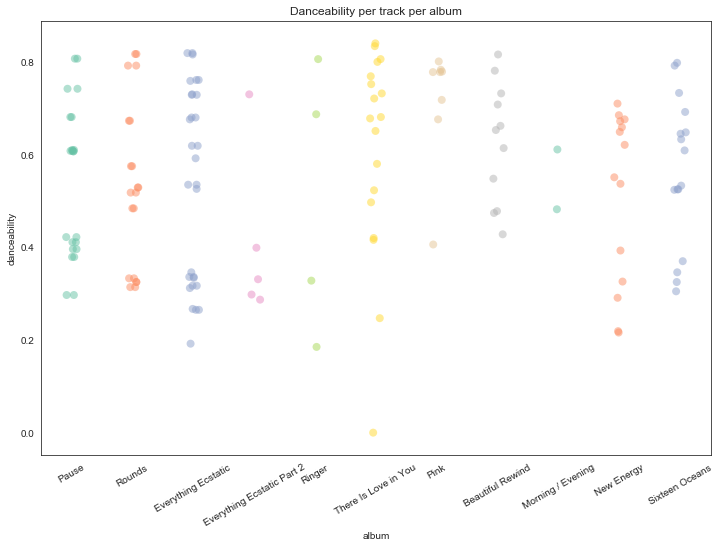

In [17]:
# Now I want to look at the danceability for tracks for each album

# Setting the style to white to better visualize the plot
sns.set_style('white')

plot_function('Strip', 'Danceability per track per album', x='album', y='danceability', 
              data=df.sort_values('release_year'), alpha=0.5, jitter=True, palette='Set2', size=8, 
              figsize=[12, 8], rotation=30)

In [18]:
# From this it looks like 'There is Love in You' is the track with the most danceability amongst all albums, 
# but also the track with the least danceability amongst all albums. I will double check here to confirm

df[(df['danceability'] == df['danceability'].max()) | (df['danceability'] == df['danceability']
                                                       .min())].sort_values('danceability', ascending=False)

,Unnamed: 0,album,track_number,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,release_year
106,55,There Is Love in You,5,sing,0.152,0.84,0.562,0.261,0.679,-9.745,0.175,121.975,0.796,36,5,1,2010
0,54,There Is Love in You,4,pablo's heart,0.996,0.00,0.642,0.883,0.220,-33.929,0.000,0.000,0.000,0,11,1,2010


So interestingly both the most danceable track, and the least danceable track are borht on the 'There is Love in You' album. Something that's also interesting is that the track 'sing' which is the most danceable track has a very low acousticness, while the track 'pablo's heart' which is the least danceable track has an extremely high acousticness.

In [19]:
# I want to plot out 4 graphs with 2 graphs per row, and 2 graphs per column showing the top 10 percentile for
# acousticness and the top 10 percentile for danceability plotting the acousticness and danceability
# for both.

# First I will create dataframes of only the top 10 percentile of both acousticness and danceability

aq = np.percentile(df['acousticness'], 90)
dq = np.percentile(df['danceability'], 90)

top_10_p_acousticness = df[df['acousticness'] >= aq]
top_10_p_danceability = df[df['danceability'] >= dq]

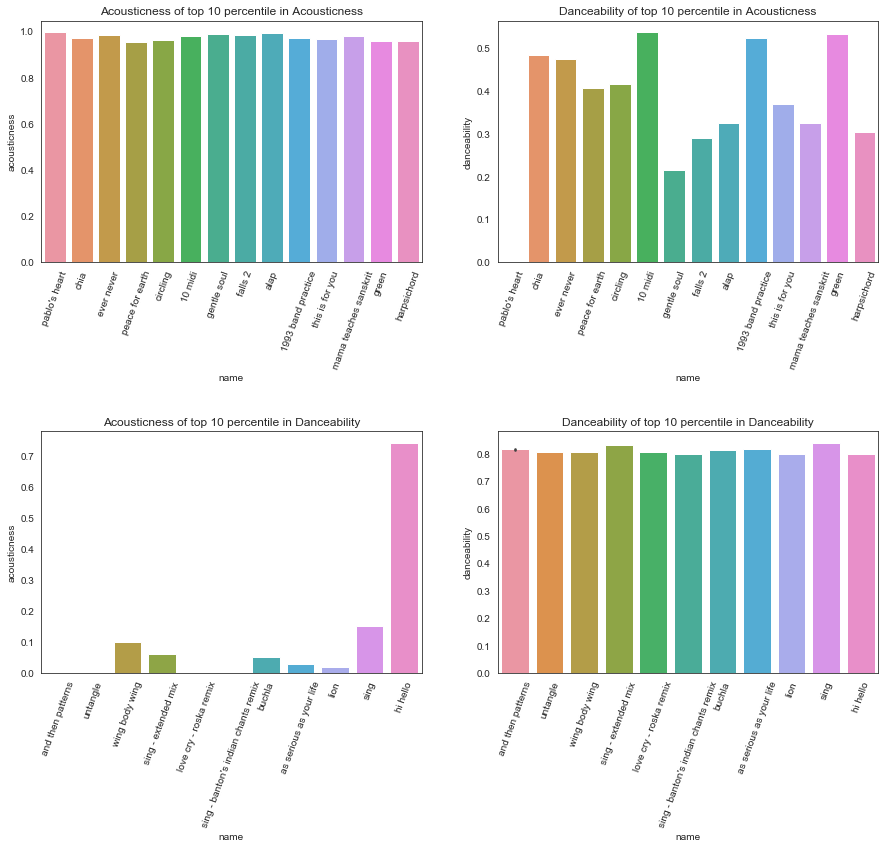

In [20]:
# Plotting them

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
g = sns.barplot(x='name', y='acousticness', data=top_10_p_acousticness)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title('Acousticness of top 10 percentile in Acousticness')

plt.subplot(2, 2, 2)
g = sns.barplot(x='name', y='danceability', data=top_10_p_acousticness)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title('Danceability of top 10 percentile in Acousticness')

plt.subplot(2, 2, 3)
g = sns.barplot(x='name', y='acousticness', data=top_10_p_danceability)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title('Acousticness of top 10 percentile in Danceability')

plt.subplot(2, 2, 4)
g = sns.barplot(x='name', y='danceability', data=top_10_p_danceability)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title('Danceability of top 10 percentile in Danceability')

plt.subplots_adjust(hspace=0.7)

plt.show()

It looks like the most acoustic tracks can still be very danceable tracks, although it varies from track to track. However it looks like the most danceable are extremely unacoustic with the exception of one track **hi hello**.

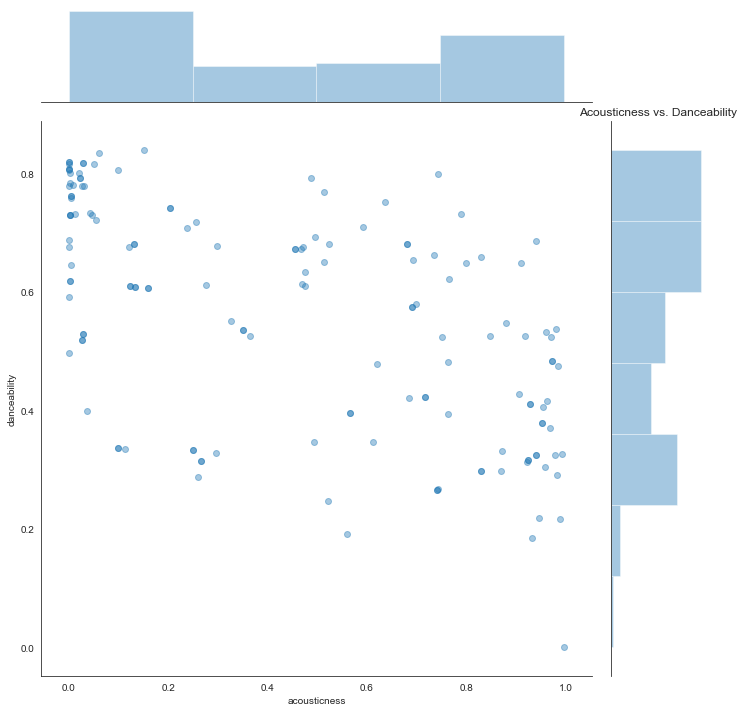

In [24]:
# To further investigate I am going to create a Joint Plot between acousticness and danceability

sns.jointplot(x='acousticness', y='danceability', data=df, height=10, alpha=0.4)
plt.title('Acousticness vs. Danceability')
plt.show()

Overall it doesn't look like there's a clear cut relationship between acousticness and danceability as I originally might have thought.

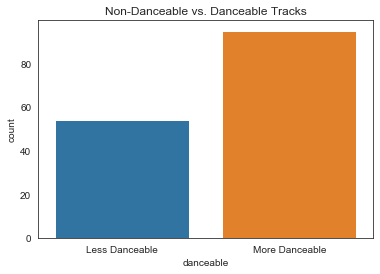

In [25]:
# Lastly with regards to danceability, I want to see the count of tracks that have above 0.5 danceability, vs.
# tracks that have below 0.5. I will make a new column with a 0 for all tracks under 0.5 and a 1 for all tracks
# above 0.5

danceability = df.copy()
danceability['danceable'] = df['danceability'].apply(lambda x: 'Less Danceable' if x < 0.5 else 'More Danceable')

sns.countplot(x='danceable', data=danceability)
plt.title('Non-Danceable vs. Danceable Tracks')
plt.show()

In [26]:
# Here I will calculate the percentage of Four Tet's that are considered danceable. My threshold for a track being
# danceable is above or equal to 0.5 in Spotify's danceability metric

round(100.0 * len(danceability[danceability['danceable'] == 'More Danceable'])/len(danceability), 2)

63.76

So from this it looks like more than half of Four Tet's tracks are considered More Danceable - roughly 64 percent of his tracks are considered to be more danceable.

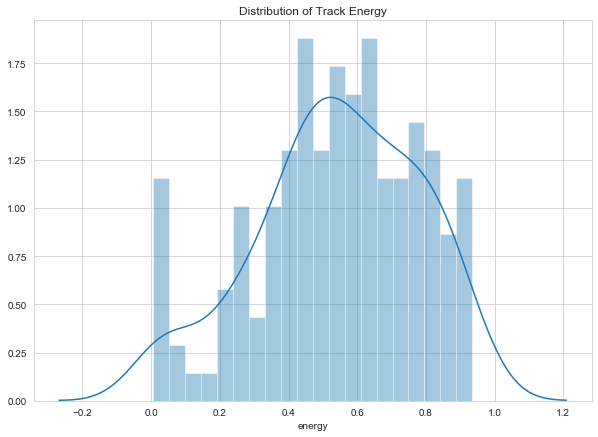

In [30]:
# Next I will look at the overall energy of Four Tet's discography. Plotting the distribution of energy here
sns.set_style('whitegrid')

plot_function('Hist', 'Distribution of Track Energy', x='energy', data=df, bins=20, figsize=[10, 7], kde=True)

In [31]:
# Grouping by album to see which album on average has the most energy

album_by_energy = df.groupby(['album', 'release_year'])['energy'].mean().reset_index()
album_by_energy.sort_values('release_year', inplace=True)
album_by_energy

,album,release_year,energy
5,Pause,2001,0.527727
8,Rounds,2003,0.587160
1,Everything Ecstatic,2005,0.567966
2,Everything Ecstatic Part 2,2006,0.645600
7,Ringer,2008,0.716000
10,There Is Love in You,2010,0.597889
6,Pink,2012,0.664000
0,Beautiful Rewind,2013,0.511155
3,Morning / Evening,2015,0.436500
4,New Energy,2017,0.391089


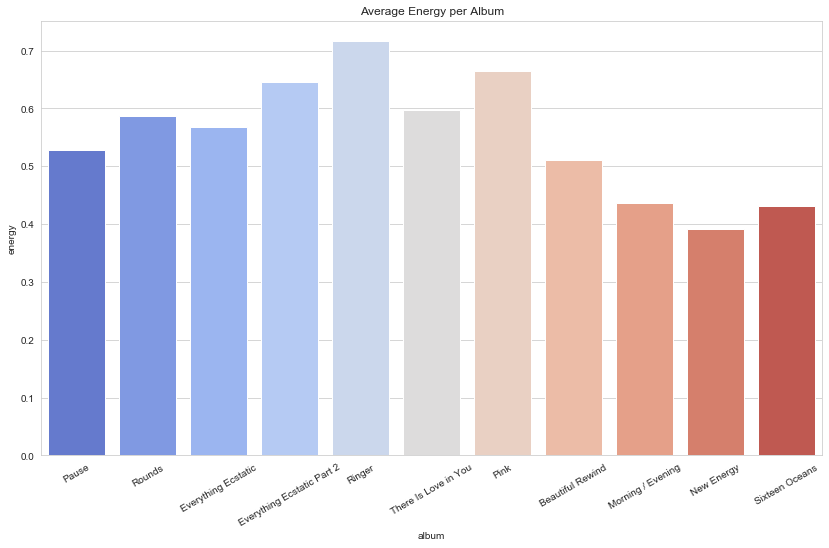

In [32]:
# Plotting average album energy

plot_function('Bar', 'Average Energy per Album', x='album', y='energy', data=album_by_energy, palette='coolwarm',
             figsize=[14, 8], rotation=30)

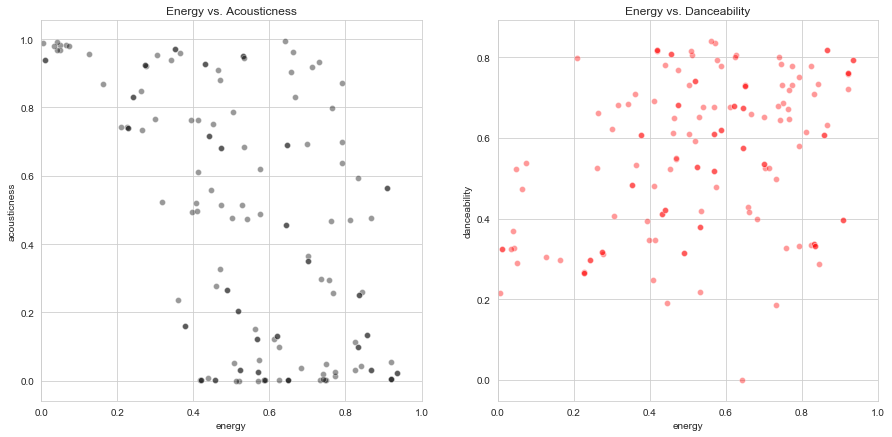

In [33]:
# Checking to see relationships between energy and acousticness, and energy and danceability

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='energy', y='acousticness', data=df, alpha=0.4, color='black')
plt.xlim(0, 1)
plt.title('Energy vs. Acousticness')

plt.subplot(1, 2, 2)
sns.scatterplot(x='energy', y='danceability', data=df, alpha=0.4, color='red')
plt.xlim(0, 1)
plt.title('Energy vs. Danceability')

plt.show()

It looks like there are clusters within both plots above that have somewhat of a relationship.
For example, in the energy vs. acousticness plot, there's a cluster of highly acoustic, lower energetic tracks, highly acoustic and highly energetic tracks, medium acoustic and high energy tracks, and low acoustic and high energy tracks.

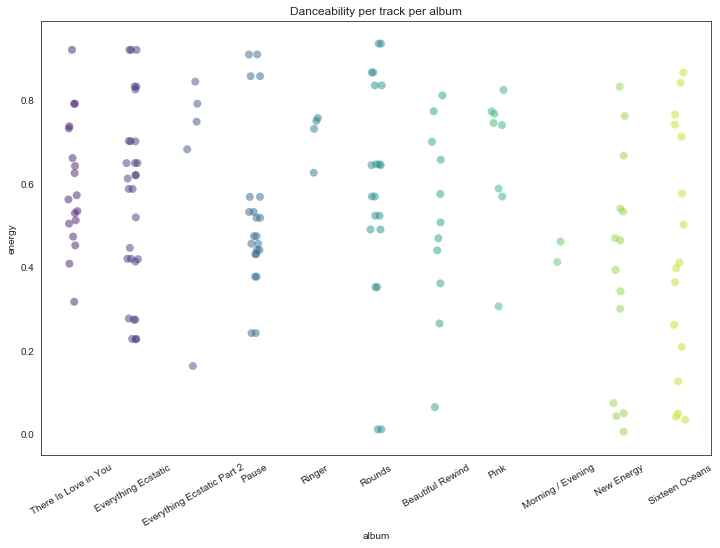

In [34]:
# Plotting the energy for each track on each album
sns.set_style('white')

plot_function('Strip', 'Danceability per track per album', x='album', y='energy', data=df, alpha=0.5, jitter=True, 
              palette='viridis', size=8, figsize=[12, 8], rotation=30)

It looks like a majority of Four Tet's album have a widespread range of energy. His two lateset album Sixteen Oceans and New Energy have the biggest range when it comes to track energy. I don't see much of a trend in the change of his album's energy though, because the energy in his albums are all relatively consistent. His two latest albums do show that he has started to incorporate some more less energetic music into his albums, however he keeps the energy widespread through both albums.

In [35]:
# Looking at Four Tet's least energetic track, and his most energetic track

df[(df['energy'] == df['energy'].max()) | (df['energy'] == df['energy'].min())]

,Unnamed: 0,album,track_number,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,release_year
78,109,Rounds,2,she moves she,0.0218,0.792,0.93500,0.917,0.0615,-3.728,0.0599,114.033,0.4730,28,9,0,2003
105,119,Rounds,2,she moves she,0.0218,0.792,0.93500,0.917,0.0615,-3.728,0.0599,114.033,0.4730,35,9,0,2003
114,28,New Energy,13,gentle soul,0.9880,0.216,0.00585,0.902,0.0916,-34.014,0.0485,94.024,0.0582,38,5,0,2017


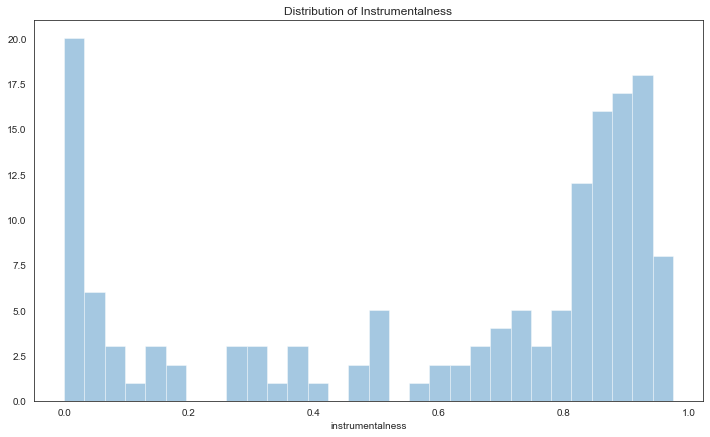

In [40]:
# Checking out the distribution of Instrumentalness across his albums

plot_function('Hist', 'Distribution of Instrumentalness', x='instrumentalness', data=df, bins=30, figsize=[12, 7])

As I anticipated, most of his tracks are highly instrumental, and contain very limited vocal content. It does look like a lot of his tracks are also considered to contain a lot of vocal content. I want to see how this varies per track over albums.

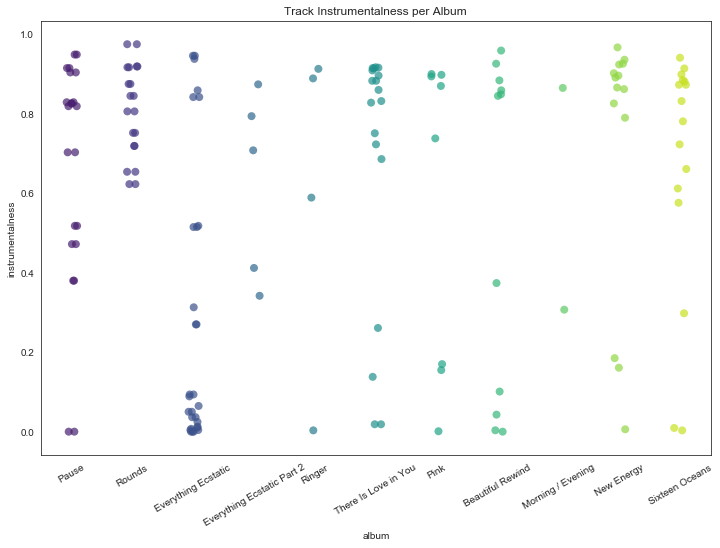

In [41]:
plot_function('Strip', 'Track Instrumentalness per Album', x='album', y='instrumentalness', 
              data=df.sort_values('release_year'), size=8, palette='viridis', alpha=0.7,
             figsize=[12, 8], rotation=30)

I looks like the majority of Four Tet's music is highly instrumental with exception to his album 'Everything Ecstatic'. It looks like this album contained a lot of music with high vocal content. As his career has progressed though it would appear that his music became more instrumental based with limited amount of vocal content. His album 'Rounds' has only highly instrumental tracks. It would appear that for that album he focusued on more of a club style electonic beat heavy album.

In [42]:
# I am curious to check and see what keys most of Four Tet's music is in

df['key'].value_counts()

9     24
1     17
0     16
11    14
10    14
7     14
8     13
6     10
2     10
5      8
4      7
3      2
Name: key, dtype: int64

In [43]:
# Since there were no -1 values present for Key it looks like each key value was detected. Now I want to see how
# many track keys were in major vs. minor

df['mode'].value_counts()

1    89
0    60
Name: mode, dtype: int64

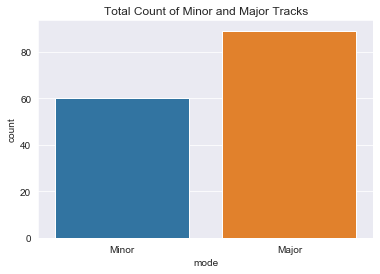

In [61]:
g=sns.countplot(x='mode', data=df)
g.set_xticklabels(['Minor', 'Major'])
plt.title('Total Count of Minor and Major Tracks')
plt.show()

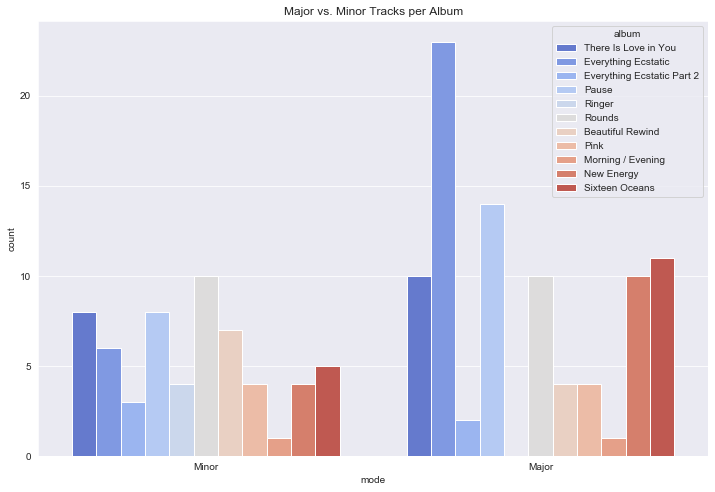

In [62]:
# So it looks like most of Four Tet's tracks were in Major keys. I want to see how that is reflected per album

plt.figure(figsize=(12, 8))
g=sns.countplot(x='mode', hue='album', data=df, palette='coolwarm')
g.set_xticklabels(['Minor', 'Major'])
plt.title('Major vs. Minor Tracks per Album')
plt.show()

In [50]:
# I want to see the actual keys and visualize what are the most frequent keys in his music, and per albums.
# I am going to create a function to add a column to df.

def key_and_mode(row):
    if row['key'] == 0 and row['mode'] == 1:
        return 'C-Major'
    elif row['key'] == 0 and row['mode'] == 0:
        return 'C-minor'
    elif row['key'] == 1 and row['mode'] == 1:
        return 'C#-Major'
    elif row['key'] == 1 and row['mode'] == 0:
        return 'C#-minor'
    elif row['key'] == 2 and row['mode'] == 1:
        return 'D-Major'
    elif row['key'] == 2 and row['mode'] == 0:
        return 'D-minor'
    elif row['key'] == 3 and row['mode'] == 1:
        return 'D#-Major'
    elif row['key'] == 3 and row['mode'] == 0:
        return 'D#-minor'
    elif row['key'] == 4 and row['mode'] == 1:
        return 'E-Major'
    elif row['key'] == 4 and row['mode'] == 0:
        return 'E-minor'
    elif row['key'] == 5 and row['mode'] == 1:
        return 'F-Major'
    elif row['key'] == 5 and row['mode'] == 0:
        return 'F-minor'
    elif row['key'] == 6 and row['mode'] == 1:
        return 'F#-Major'
    elif row['key'] == 6 and row['mode'] == 0:
        return 'F#-minor'
    elif row['key'] == 7 and row['mode'] == 1:
        return 'G-Major'
    elif row['key'] == 7 and row['mode'] == 0:
        return 'G-minor'
    elif row['key'] == 8 and row['mode'] == 1:
        return 'G#-Major'
    elif row['key'] == 8 and row['mode'] == 0:
        return 'G#-minor'
    elif row['key'] == 9 and row['mode'] == 1:
        return 'A-Major'
    elif row['key'] == 9 and row['mode'] == 0:
        return 'A-minor'
    elif row['key'] == 10 and row['mode'] == 1:
        return 'A#-Major'
    elif row['key'] == 10 and row['mode'] == 0:
        return 'A#-minor'
    elif row['key'] == 11 and row['mode'] == 1:
        return 'B-Major'
    elif row['key'] == 11 and row['mode'] == 0:
        return 'B-minor'

In [51]:
# Creating a new column to show the key and mode for each track

df['key_n_mode'] = df.apply(lambda row: key_and_mode(row), axis=1)

In [52]:
df.head()

,Unnamed: 0,album,track_number,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,release_year,key_n_mode
0,54,There Is Love in You,4,pablo's heart,0.99600,0.000,0.642,0.88300,0.220,-33.929,0.0000,0.000,0.0000,0,11,1,2010,B-Major
1,100,Everything Ecstatic,3,fuji check,0.61200,0.346,0.413,0.00722,0.391,-25.803,0.0667,79.387,0.0485,0,4,0,2005,E-minor
2,80,Everything Ecstatic,3,fuji check,0.55900,0.192,0.446,0.01270,0.392,-25.851,0.0635,87.523,0.0510,0,7,1,2005,G-Major
3,106,Everything Ecstatic,9,"sleep, eat food, have vision",0.00426,0.759,0.920,0.31300,0.114,-6.091,0.0628,106.027,0.2990,4,1,1,2005,C#-Major
4,105,Everything Ecstatic,8,turtle turtle up,0.36500,0.526,0.702,0.93800,0.718,-13.266,0.0605,76.028,0.6870,4,6,0,2005,F#-minor


In [53]:
# Looking at the value counts for each key_n_mode

df['key_n_mode'].value_counts()

A-Major     15
C-Major     14
G-Major     12
C#-Major    12
D-Major     10
A-minor      9
G#-Major     8
A#-minor     8
B-Major      7
F-minor      7
E-minor      7
B-minor      7
F#-minor     6
A#-Major     6
C#-minor     5
G#-minor     5
F#-Major     4
D#-minor     2
G-minor      2
C-minor      2
F-Major      1
Name: key_n_mode, dtype: int64

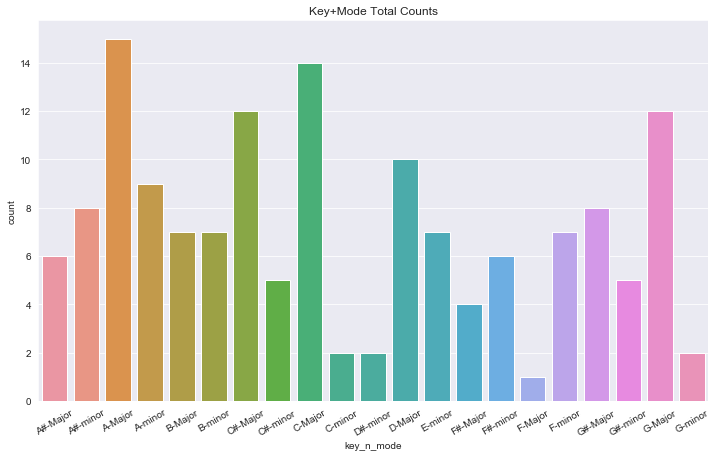

In [60]:
# Visualizing with a countplot
sns.set_style('darkgrid')


plot_function('Count', 'Key+Mode Total Counts', x='key_n_mode', data=df.sort_values('key_n_mode'), figsize=[12,7],
             rotation=30)

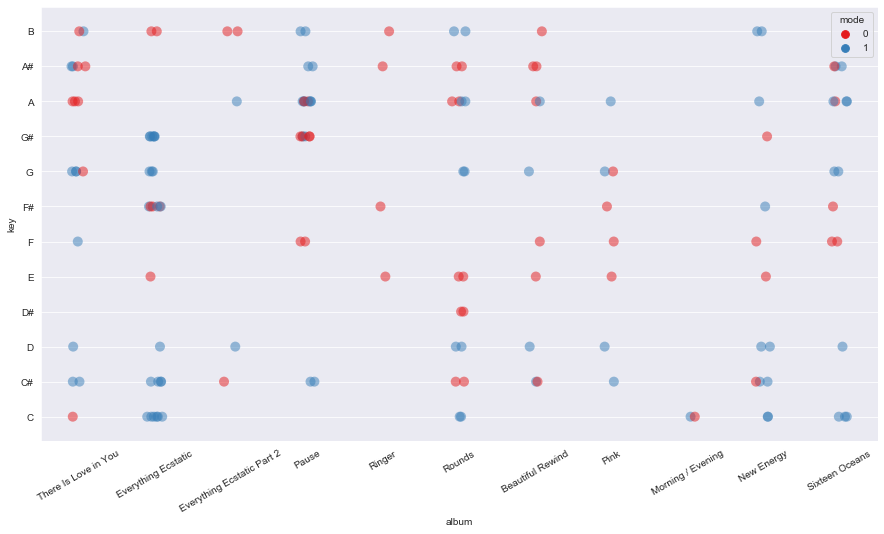

In [63]:
# Plotting out the different keys and modes per song for each album. The 0 is for a minor mode, and the 1 is major
plt.figure(figsize=(15, 8))
g=sns.stripplot(x='album', y='key', hue='mode', data=df, alpha=0.5, size=10, palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_yticks(range(len(df['key'].unique())))
g.set_yticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.show()

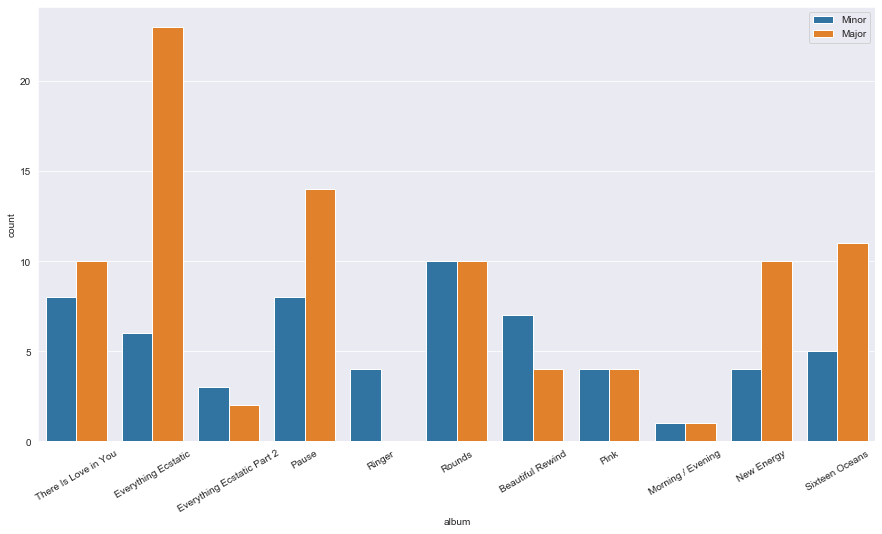

In [64]:
# Counting the amount of Major vs. Minor tracks per album
plt.figure(figsize=(15, 8))
g=sns.countplot(x='album', data=df, hue='mode')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.legend(['Minor', 'Major'])
plt.show()

Overall it looks like Four Tet's music spans between major and minor modes almost evenly with a slight edge to more major songs over minor. His two most recent album along with his first two albums and his album 'Pause' have a lot more tracks in the Major mode then the minor mode it would seem. He loves the keys C-major, and A-major, however D-major and E-minor are on almost every single album. Something intersting to note is one his two track album 'Morning / Evening' both tracks are in the key C, with one track being C-major, and the other track being C-minor.

His album Rounds which has low vocal content and one that I presumed to be a more club style album has an even amount of minor mode tracks and major mode tracks. I would've expected it to have more minor mode tracks. With exception to his albums 'Ringer' and 'Everything Ecstatic Part 2' all of his albums are either evenly spread between major and minor tracks, or favor major tracks.

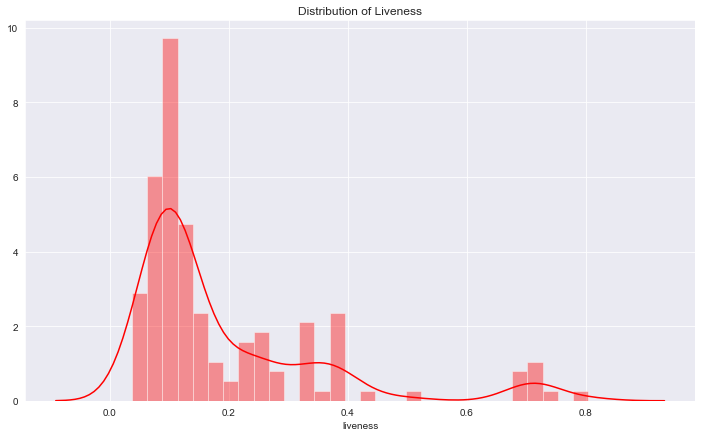

In [69]:
# Next I will look at the overall Liveness of Four Tet's discography. Here I am plotting the distribution of
# liveness

plot_function('Hist', 'Distribution of Liveness', x='liveness', data=df, bins=30, color='red', figsize=[12, 7],
             kde=True)

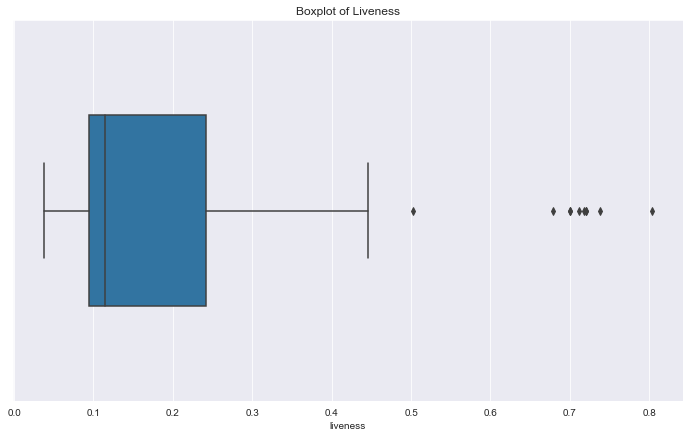

In [71]:
# It looks like the majority of his tracks are not preformed live as anticipated. I will look at a boxplot to
# further investigate this

plot_function('Box', 'Boxplot of Liveness', x='liveness', data=df, orient='h', width=0.5, figsize=[12, 7])